# Illustration de la PCA dans la compression d'images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

# Charger l'image en noir et blanc carrée (par exemple, 100x100 pixels)
image_path = join("..","data","lena.png")
original_image = plt.imread(image_path)
original_image = original_image[:,:,0] / 255
# Image.open(image_path).convert('L')  # Convertir en niveaux de gris

image_array = np.array(original_image)

# Vérifier les dimensions de l'image
print("Dimensions de l'image originale :", image_array.shape)


Dimensions de l'image originale : (512, 512)


(-0.5, 511.5, 511.5, -0.5)

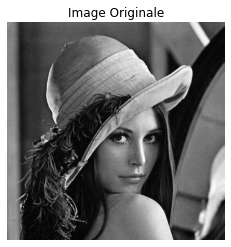

In [3]:
plt.figure(figsize=(12, 4))
plt.imshow(image_array, cmap='gray')
plt.title("Image Originale")
plt.axis('off')

In [2]:

# Effectuer la SVD (Décomposition en valeurs singulières)
U, S, Vt = np.linalg.svd(image_array, full_matrices=False)

# Afficher les dimensions des matrices U, S et Vt
print("Matrice U :", U.shape)
print("Matrice S (valeurs singulières) :", S.shape)
print("Matrice Vt :", Vt.shape)


Matrice U : (512, 512)
Matrice S (valeurs singulières) : (512,)
Matrice Vt : (512, 512)


(-0.5, 511.5, 511.5, -0.5)

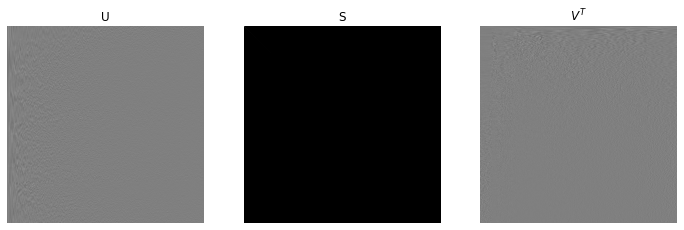

In [9]:
# Tracé 1D des valeurs propres
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(U, cmap='gray')
plt.title("U")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.diag(S), cmap='gray')
plt.title("S")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Vt, cmap='gray')
plt.title(r"$V^T$")
plt.axis('off')

Text(0.5, 1.0, '$V^T$')

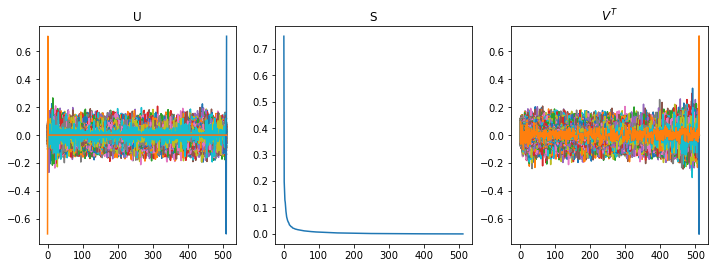

In [12]:
# Tracé 1D des valeurs propres
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(U)
plt.title("U")

plt.subplot(1, 3, 2)
plt.plot(S)
plt.title("S")


plt.subplot(1, 3, 3)
plt.plot(Vt)
plt.title(r"$V^T$")


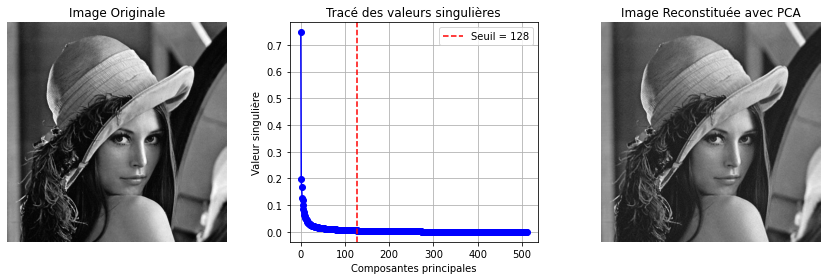

In [15]:
threshold = 128  # Choisissez la valeur appropriée


# Tracé 1D des valeurs propres
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Image Originale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(S, marker='o', linestyle='-', color='b')
plt.title("Tracé des valeurs singulières")
plt.xlabel("Composantes principales")
plt.ylabel("Valeur singulière")
plt.grid(True)

# Ligne verticale pour montrer les valeurs propres conservées
plt.axvline(x=threshold, color='r', linestyle='--', label=f"Seuil = {threshold}")
plt.legend()

# Reconstituer l'image à partir des valeurs singulières conservées
compressed_image = np.dot(U[:, :threshold], np.dot(np.diag(S[:threshold]), Vt[:threshold, :]))

plt.subplot(1, 3, 3)
plt.imshow(compressed_image, cmap='gray')
plt.title("Image Reconstituée avec PCA")
plt.axis('off')

plt.tight_layout()
plt.show()
